In [14]:
import numpy as np
from PIL import Image
import glob
import re

In [15]:
IMGS_DIR = "character_imgs/ascii/CascadiaMono/"

In [16]:
img = Image.open(IMGS_DIR + "100.bmp")
img_arr = np.array(img)

img_size = img_arr.size
img_shape = img_arr.shape
if (img_arr.shape[0] % 2):
    img_arr = np.delete(img_arr, 0, 0)

print(img_size, img_shape)
print(np.split(img_arr, 2)[0].shape)
img

190 (19, 10)
(9, 10)


In [17]:
img_ls = glob.glob(IMGS_DIR + "*.bmp")
char_ls = {}
for i in range(0, len(img_ls)):
    img = Image.open(img_ls[i])
    img = np.array(img)
    if (img.shape[0] % 2):
        img = np.delete(img, 0, 0)
    img_top_bottom = np.split(img, 2)
    top_brightness = (img_top_bottom[0] > 0).sum() / (img.size / 2)
    bottom_brightness = (img_top_bottom[1] > 0).sum() / (img.size / 2)
    char_ls[chr(int(re.findall(r'\d+', img_ls[i])[0]))] = (
                top_brightness,
                bottom_brightness,
                (top_brightness + bottom_brightness) / 2
                )


In [18]:
brightness_ls = sorted(list(char_ls.items()), key=lambda a: a[1][2])

print(brightness_ls)

[(' ', (0.0, 0.0, 0.0)), ('.', (0.0, 0.08888888888888889, 0.044444444444444446)), ("'", (0.16666666666666666, 0.0, 0.08333333333333333)), ('`', (0.16666666666666666, 0.0, 0.08333333333333333)), (',', (0.0, 0.17777777777777778, 0.08888888888888889)), (':', (0.08888888888888889, 0.08888888888888889, 0.08888888888888889)), ('-', (0.1, 0.1, 0.1)), ('_', (0.0, 0.2, 0.1)), (';', (0.08888888888888889, 0.17777777777777778, 0.13333333333333333)), ('"', (0.28888888888888886, 0.0, 0.14444444444444443)), ('^', (0.28888888888888886, 0.0, 0.14444444444444443)), ('~', (0.16666666666666666, 0.16666666666666666, 0.16666666666666666)), ('!', (0.2, 0.14444444444444443, 0.17222222222222222)), ('L', (0.13333333333333333, 0.24444444444444444, 0.18888888888888888)), ('=', (0.2, 0.2, 0.2)), ('l', (0.2222222222222222, 0.2111111111111111, 0.21666666666666667)), ('+', (0.23333333333333334, 0.2, 0.21666666666666667)), ('>', (0.24444444444444444, 0.18888888888888888, 0.21666666666666667)), ('1', (0.222222222222222

In [19]:
import matplotlib.pyplot as plt

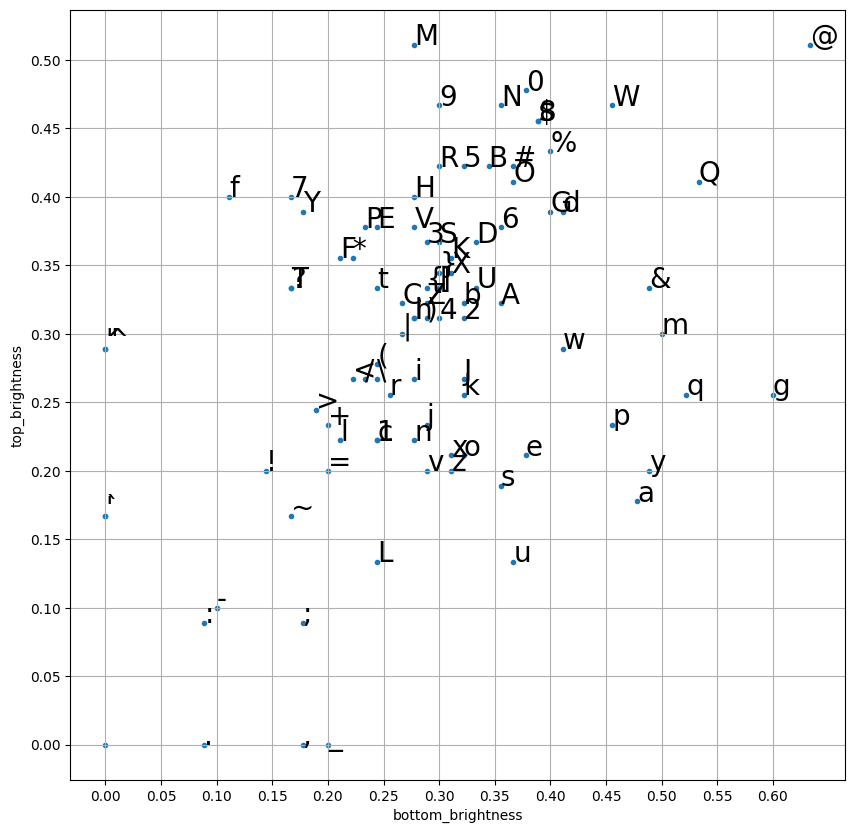

In [20]:
plt.figure(figsize=(10, 10))
top_brightness = [a[1][0] for a in brightness_ls]
bottom_brightness = [a[1][1] for a in brightness_ls]
plt.scatter(bottom_brightness, top_brightness, marker='.')
plt.xticks(np.arange(min(bottom_brightness), max(bottom_brightness), 0.05))
plt.yticks(np.arange(min(top_brightness), max(top_brightness), 0.05))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(char_ls)):
    plt.annotate(brightness_ls[i][0], (bottom_brightness[i], top_brightness[i]), size=20)
plt.grid()

In [21]:
y_dim = 9
x_dim = 9
brightness_arr = [[''] * x_dim for _ in range(y_dim)]

n_top_brightness = list(map(lambda b: b / max(top_brightness), top_brightness))
n_bottom_brightness = list(map(lambda b: b / max(bottom_brightness), bottom_brightness))

char_to_n_bt_brightness = {}
for b in zip(brightness_ls, n_top_brightness, n_bottom_brightness):
    char_to_n_bt_brightness[b[0][0]] = (b[1], b[2], (b[1] + b[2]) / 2)

for c, b in char_to_n_bt_brightness.items():
    brightness_arr[round(b[0] * (y_dim - 1))][round(b[1] * (x_dim - 1))] += c

for row in brightness_arr:
    print(row)

[' ', '.', ',', '_', '', '', '', '', '']
['', ':', ';', '', '', '', '', '', '']
['', '-', '', 'L', '', 'u', '', '', '']
["'`", '', '~!', '=l1c', 'vnzxos', 'e', 'ay', '', '']
['', '', '>', '+</r\\(', 'jikJ', '', 'p', 'q', 'g']
['"^', '', '?T', '|tC', 'hI)4Z{2[]}bXUA', 'w', 'm&', '', '']
['', 'f', '7Y', 'F*PE', '3VSKHD6', 'OGd', '', 'Q', '']
['', '', '', '', 'R59BN', '#%$80', 'W', '', '']
['', '', '', '', 'M', '', '', '', '@']


In [22]:
def splice_cell(top, left):
    res = top[0]
    for a in top:
        if (char_to_n_bt_brightness[res][2] < char_to_n_bt_brightness[a][2]):
            res = a

    for a in left:
        if (char_to_n_bt_brightness[res][2] < char_to_n_bt_brightness[a][2]):
            res = a
    return res


for y in range(y_dim):
    for x in range(x_dim):
        if brightness_arr[y][x] == '':
            if x > 0 and y > 0:
                brightness_arr[y][x] += splice_cell(brightness_arr[y-1][x], brightness_arr[y][x-1])
            elif x > 0:
                brightness_arr[y][x] += brightness_arr[y][x - 1][-1]
            elif y > 0:
                brightness_arr[y][x] += brightness_arr[y - 1][x][-1]
            brightness_arr[y][x] = ''.join(set(brightness_arr[y][x]))

for row in brightness_arr:
    print(row)

[' ', '.', ',', '_', '_', '_', '_', '_', '_']
[' ', ':', ';', ';', ';', ';', ';', ';', ';']
[' ', '-', ';', 'L', 'L', 'u', 'u', 'u', 'u']
["'`", '-', '~!', '=l1c', 'vnzxos', 'e', 'ay', 'y', 'y']
['`', '-', '>', '+</r\\(', 'jikJ', 'J', 'p', 'q', 'g']
['"^', '"', '?T', '|tC', 'hI)4Z{2[]}bXUA', 'w', 'm&', '&', 'g']
['^', 'f', '7Y', 'F*PE', '3VSKHD6', 'OGd', '&', 'Q', 'Q']
['^', 'f', '7', 'E', 'R59BN', '#%$80', 'W', 'Q', 'Q']
['^', 'f', '7', 'E', 'M', '0', 'W', 'Q', '@']


In [23]:
for y in range(y_dim):
    for x in range(x_dim):
        num_chars = len(brightness_arr[y][x])
        if num_chars > 1:
            brightness_arr[y][x] = brightness_arr[y][x][num_chars // 2 - 1]

b_set = set()
for row in brightness_arr:
    b_set = b_set.union(set(row))
    #print(' '.join(row))
    print(row)

print(len(b_set))

[' ', '.', ',', '_', '_', '_', '_', '_', '_']
[' ', ':', ';', ';', ';', ';', ';', ';', ';']
[' ', '-', ';', 'L', 'L', 'u', 'u', 'u', 'u']
["'", '-', '~', 'l', 'z', 'e', 'a', 'y', 'y']
['`', '-', '>', '/', 'i', 'J', 'p', 'q', 'g']
['"', '"', '?', '|', '2', 'w', 'm', '&', 'g']
['^', 'f', '7', '*', 'S', 'O', '&', 'Q', 'Q']
['^', 'f', '7', 'E', '5', '%', 'W', 'Q', 'Q']
['^', 'f', '7', 'E', 'M', '0', 'W', 'Q', '@']
45


In [24]:
b_list = []
for c in b_set:
    b_list.append((c, char_ls.get(c)))

b_list.sort(key=lambda a: (a[1][0], a[1][1]))
print(b_list)

[(' ', (0.0, 0.0, 0.0)), ('.', (0.0, 0.08888888888888889, 0.044444444444444446)), (',', (0.0, 0.17777777777777778, 0.08888888888888889)), ('_', (0.0, 0.2, 0.1)), (':', (0.08888888888888889, 0.08888888888888889, 0.08888888888888889)), (';', (0.08888888888888889, 0.17777777777777778, 0.13333333333333333)), ('-', (0.1, 0.1, 0.1)), ('L', (0.13333333333333333, 0.24444444444444444, 0.18888888888888888)), ('u', (0.13333333333333333, 0.36666666666666664, 0.25)), ('`', (0.16666666666666666, 0.0, 0.08333333333333333)), ("'", (0.16666666666666666, 0.0, 0.08333333333333333)), ('~', (0.16666666666666666, 0.16666666666666666, 0.16666666666666666)), ('a', (0.17777777777777778, 0.4777777777777778, 0.3277777777777778)), ('z', (0.2, 0.3111111111111111, 0.25555555555555554)), ('y', (0.2, 0.4888888888888889, 0.34444444444444444)), ('e', (0.2111111111111111, 0.37777777777777777, 0.29444444444444445)), ('l', (0.2222222222222222, 0.2111111111111111, 0.21666666666666667)), ('p', (0.23333333333333334, 0.455555

In [25]:
b_arr = brightness_arr
for y in range(len(b_arr)):
    for x in range(len(b_arr[y])):
        br = char_ls.get(b_arr[y][x])
        b_arr[y][x] = (round(br[0], 4), round(br[1], 4))
    print(b_arr[y])

[(0.0, 0.0), (0.0, 0.0889), (0.0, 0.1778), (0.0, 0.2), (0.0, 0.2), (0.0, 0.2), (0.0, 0.2), (0.0, 0.2), (0.0, 0.2)]
[(0.0, 0.0), (0.0889, 0.0889), (0.0889, 0.1778), (0.0889, 0.1778), (0.0889, 0.1778), (0.0889, 0.1778), (0.0889, 0.1778), (0.0889, 0.1778), (0.0889, 0.1778)]
[(0.0, 0.0), (0.1, 0.1), (0.0889, 0.1778), (0.1333, 0.2444), (0.1333, 0.2444), (0.1333, 0.3667), (0.1333, 0.3667), (0.1333, 0.3667), (0.1333, 0.3667)]
[(0.1667, 0.0), (0.1, 0.1), (0.1667, 0.1667), (0.2222, 0.2111), (0.2, 0.3111), (0.2111, 0.3778), (0.1778, 0.4778), (0.2, 0.4889), (0.2, 0.4889)]
[(0.1667, 0.0), (0.1, 0.1), (0.2444, 0.1889), (0.2667, 0.2333), (0.2667, 0.2778), (0.2667, 0.3222), (0.2333, 0.4556), (0.2556, 0.5222), (0.2556, 0.6)]
[(0.2889, 0.0), (0.2889, 0.0), (0.3333, 0.1667), (0.3, 0.2667), (0.3111, 0.3222), (0.2889, 0.4111), (0.3, 0.5), (0.3333, 0.4889), (0.2556, 0.6)]
[(0.2889, 0.0), (0.4, 0.1111), (0.4, 0.1667), (0.3556, 0.2222), (0.3667, 0.3), (0.4111, 0.3667), (0.3333, 0.4889), (0.4111, 0.5333), (0.

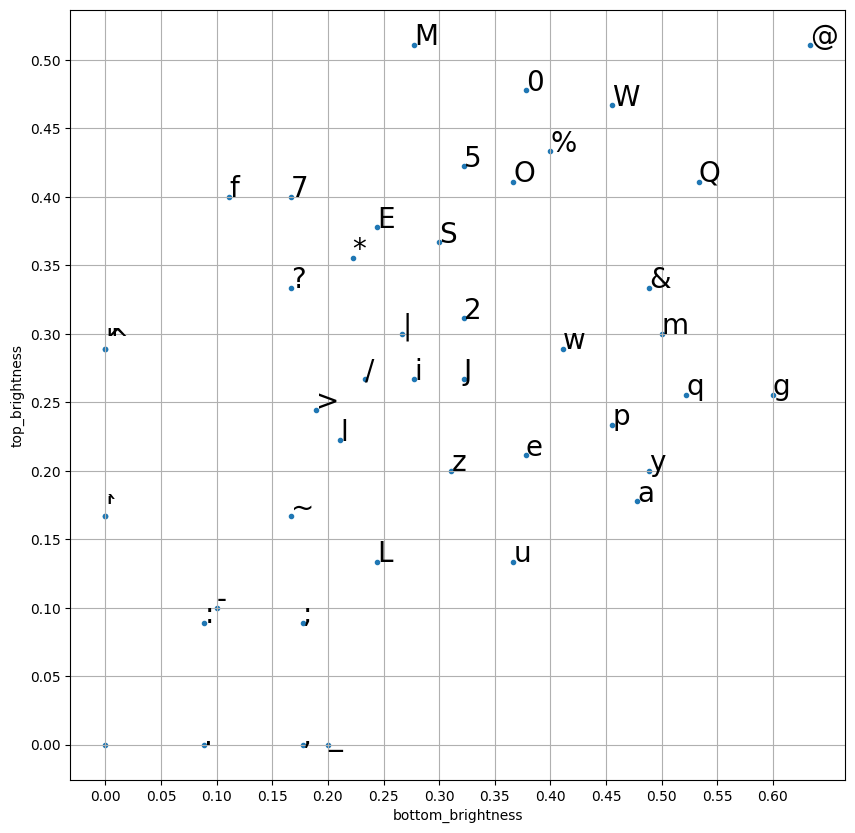

In [26]:
plt.figure(figsize=(10, 10))
b_top_brightness = [a[1][0] for a in b_list]
b_bottom_brightness = [a[1][1] for a in b_list]
plt.scatter(b_bottom_brightness, b_top_brightness, marker='.')
plt.xticks(np.arange(min(b_bottom_brightness), max(b_bottom_brightness), 0.05))
plt.yticks(np.arange(min(b_top_brightness), max(b_top_brightness), 0.05))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(b_list)):
    plt.annotate(b_list[i][0], (b_bottom_brightness[i], b_top_brightness[i]), size=20)
plt.grid()